In [1]:
# Importing the dataset

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# Importing the dataset

df = pd.read_excel('Bank_Personal_Loan_Modelling-1.xlsx',sheet_name='Data')

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Checking the shape of the dataset

df.shape

(5000, 14)

In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

## Basic EDA

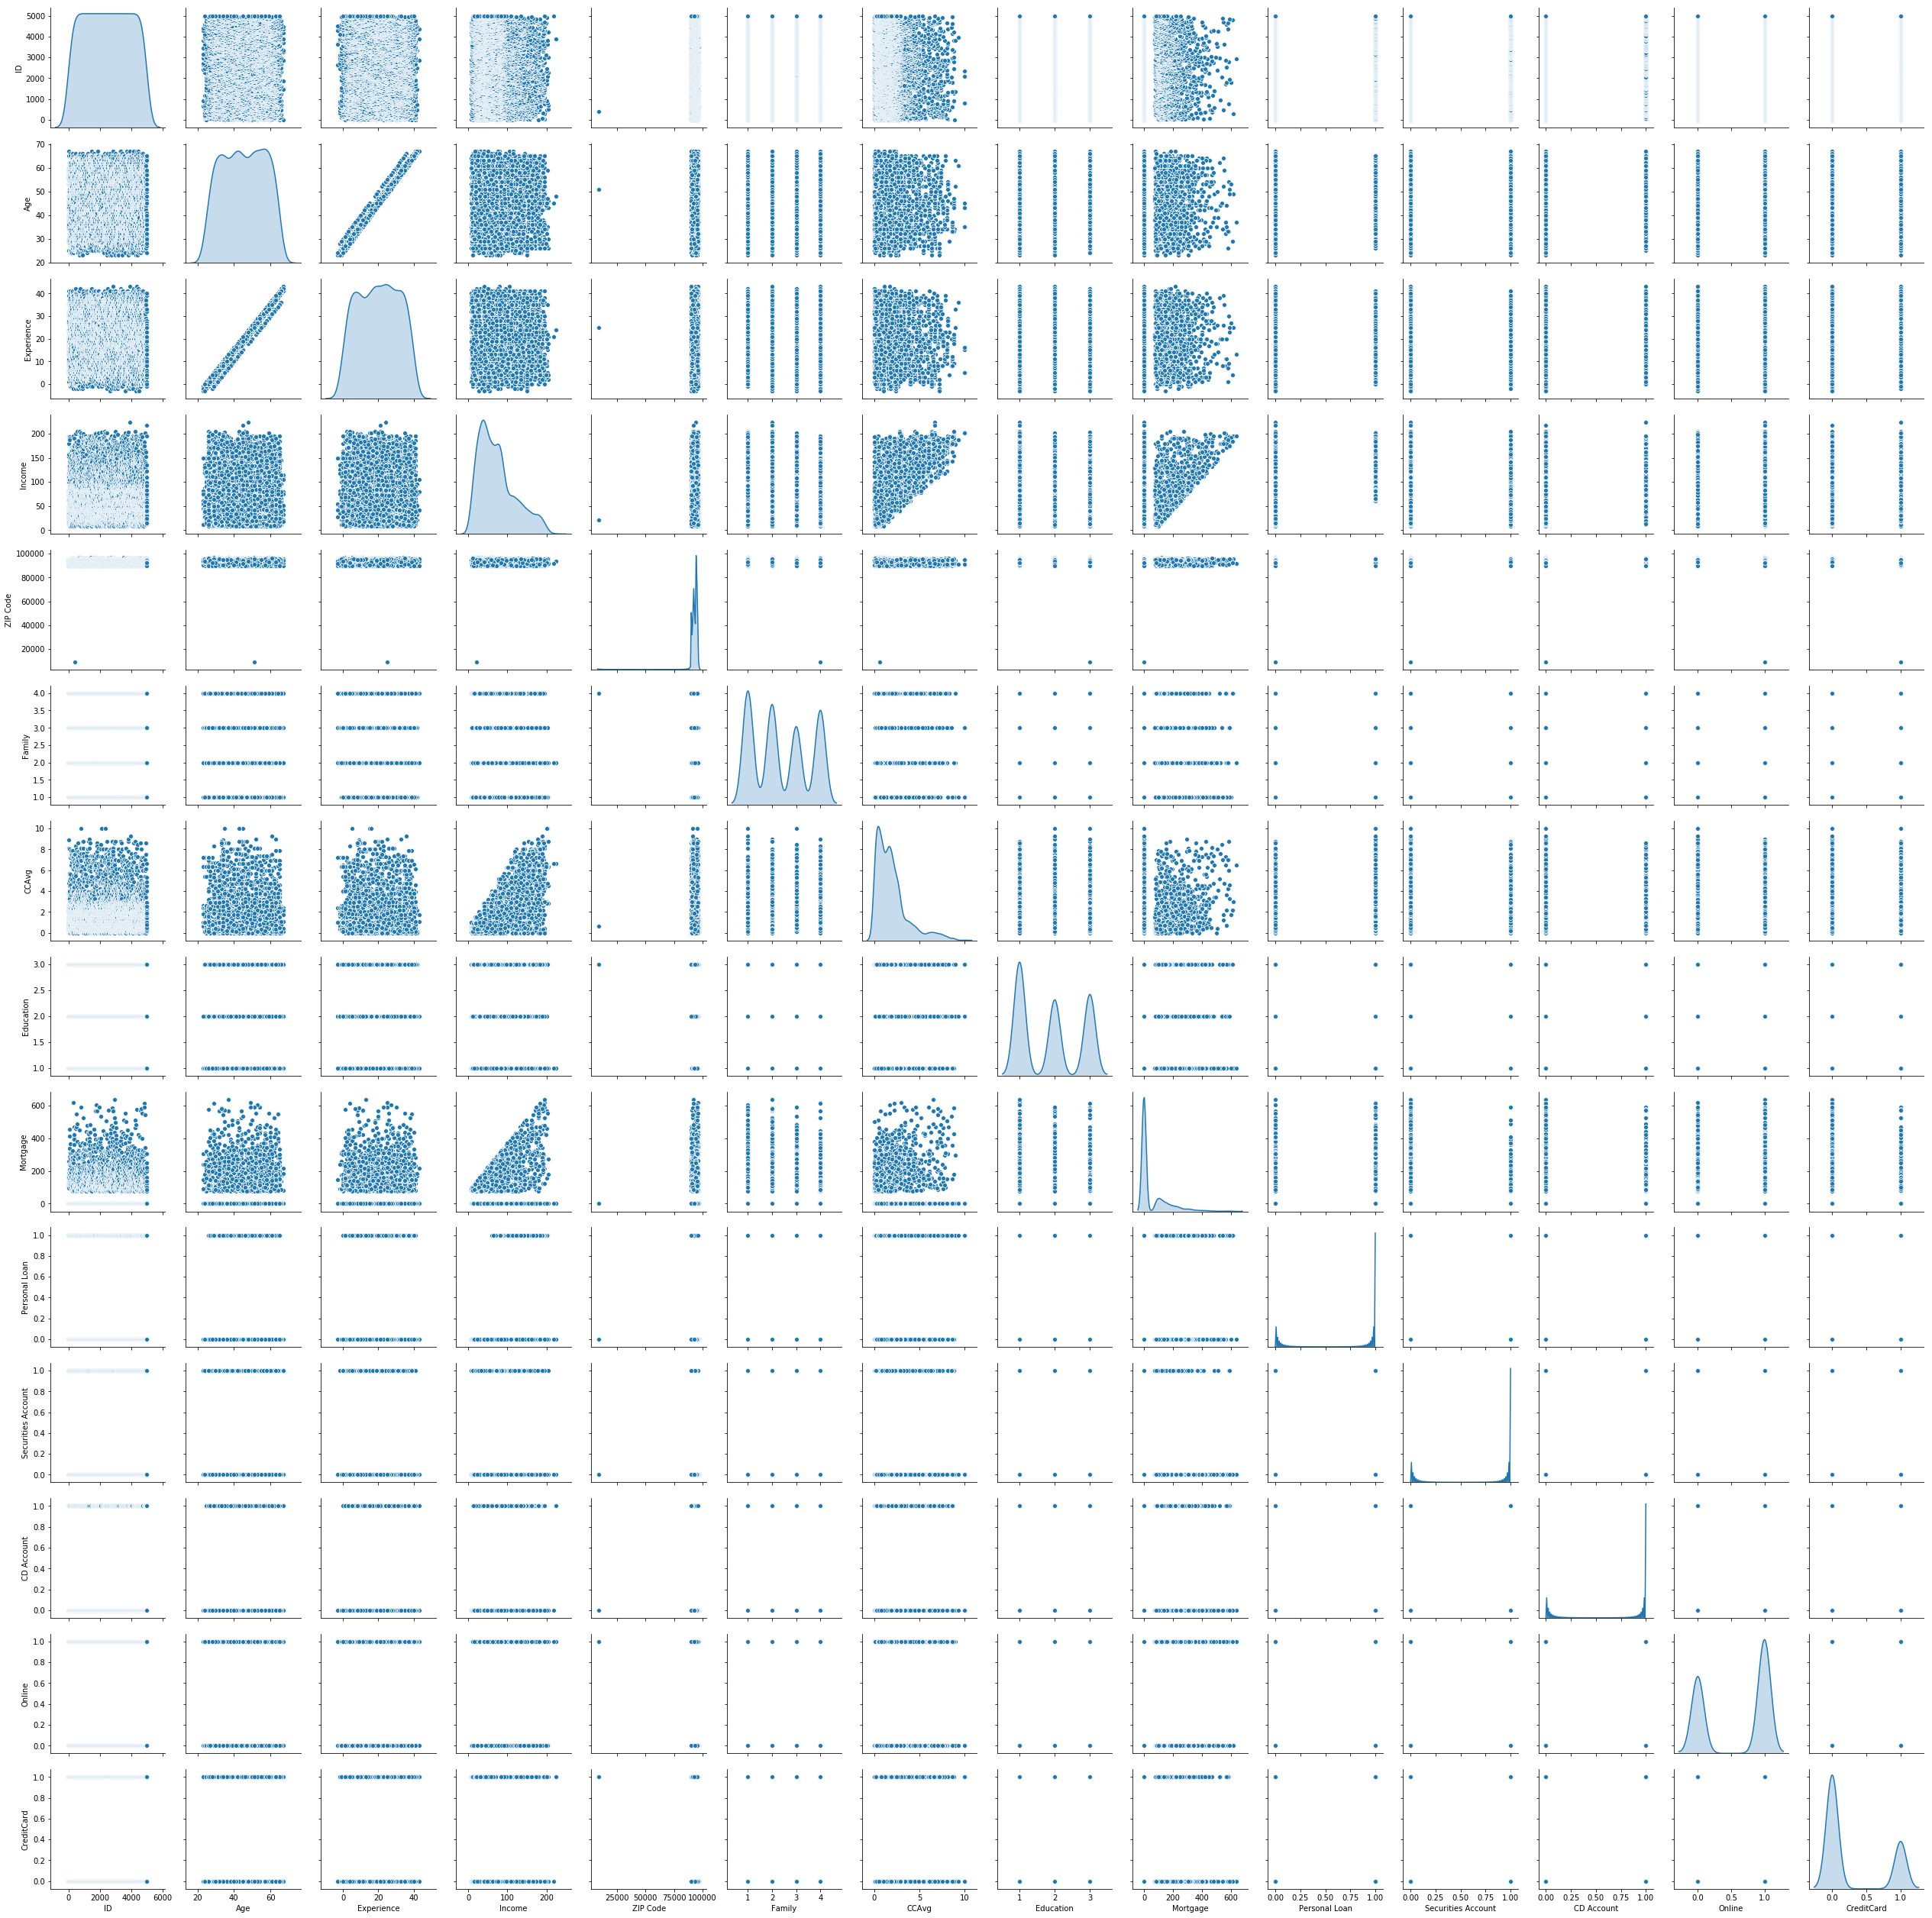

In [8]:
sns.pairplot(data=df,diag_kind = 'kde')

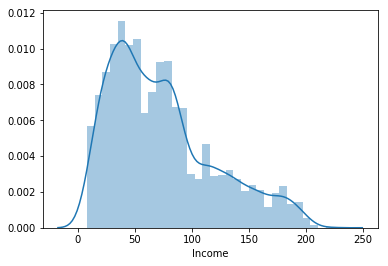

In [9]:
sns.distplot(df['Income'],kde=True)

From the above plot we can understand that income column is a right skewed distribution.

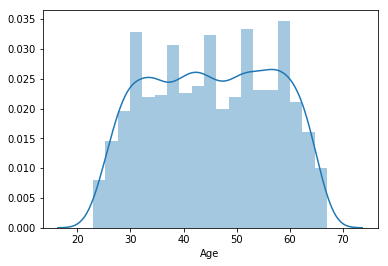

In [10]:
sns.distplot(df['Age'],kde=True)

From the above plot we can understand that age column is a normal distribution.

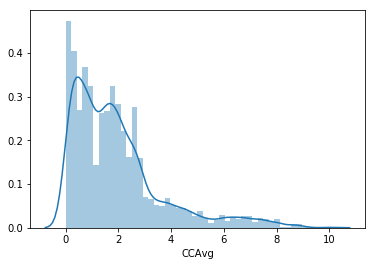

In [11]:
sns.distplot(df['CCAvg'],kde=True)

From the above plot we can understand that CCAvg column is a right skewed distributed.

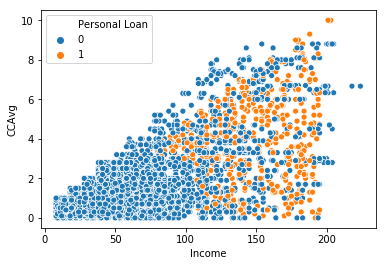

In [12]:
sns.scatterplot(x=df['Income'], y=df['CCAvg'],hue=df['Personal Loan'])

From the above plot we can understand that even people of all age is having cholestrol and also having heart diesease also

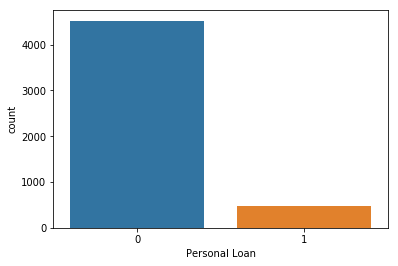

In [13]:
sns.countplot(df['Personal Loan'])

In [14]:
df.groupby(['Personal Loan'])['Personal Loan'].count()       # Number of people having heart disease and not

Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64

## Over Sampling

#### Since the number of people not having heart disease if high while compared to having heart disease. and also we have less number of records so that we are going to use a method called smote to over sample the model.

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [17]:
sm = SMOTE(random_state=1)

In [18]:
x_os, y_os = sm.fit_sample(x,y)

In [19]:
x_os.shape

(9040, 13)

### Splitting the data into train, validation and test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train1,x_test,y_train1,y_test = train_test_split(x_os,y_os,test_size=0.3,random_state=1)

In [22]:
x_train,x_val,y_train,y_val = train_test_split(x_train1,y_train1,test_size=0.3,random_state=1)

## Logistic Regression

In [23]:
lr_model = LogisticRegression()

In [24]:
lr_model.fit(x_train,y_train)       # Fitting the model using train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
lr_model.predict(x_val)             # Predicting for x_val 

array([0, 1, 1, ..., 0, 1, 1])

In [26]:
lr_model.predict(x_test)            # Predicting for main test set

array([0, 0, 0, ..., 0, 1, 0])

In [27]:
lr_model.score(x_val,y_val)         # Calculating score for validation set

0.9131121642969984

In [28]:
lr_model.score(x_test,y_test)       # Calculating score for test set

0.9118731563421829

## DecisionTree

In [29]:
dt_model = DecisionTreeClassifier()

In [30]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
dt_model.predict(x_val)

array([0, 1, 1, ..., 0, 1, 1])

In [32]:
dt_model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])

In [33]:
dt_model.score(x_val,y_val) 

0.9842022116903634

In [34]:
dt_model.score(x_test,y_test) 

0.9852507374631269

## KNN

In [35]:
kn_model = KNeighborsClassifier()

In [36]:
kn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
kn_model.predict(x_val)

array([0, 1, 1, ..., 0, 1, 1])

In [38]:
kn_model.predict(x_test)

array([1, 0, 1, ..., 0, 1, 0])

In [39]:
kn_model.score(x_val,y_val)

0.8351764086361243

In [40]:
kn_model.score(x_test,y_test)

0.8418141592920354

## Naive Bayes

In [41]:
nb_model = GaussianNB()

In [42]:
nb_model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
nb_model.predict(x_val)

array([0, 1, 1, ..., 0, 1, 0])

In [44]:
nb_model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])

In [45]:
nb_model.score(x_val,y_val)

0.8809899947340706

In [46]:
nb_model.score(x_test,y_test)

0.883480825958702

## Bootstrap Sampling

In [47]:
from sklearn.utils import resample

In [48]:
x_os = pd.DataFrame(x_os, columns=x.columns)
y_os = pd.DataFrame(y_os, columns=['Personal Loan'])

In [49]:
numos=pd.concat([x_os,y_os],axis=1)

In [50]:
numos.shape

(9040, 14)

In [51]:
numos.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0,0
1,2.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,1.0,0.0,0.0,0.0,0
2,3.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,4.0,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0
4,5.0,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0


Logistic    : 0.908600 (0.009752)
DecisionTree: 0.980601 (0.006141)
KNN         : 0.902804 (0.011820)
Naive Bayes : 0.887402 (0.008539)


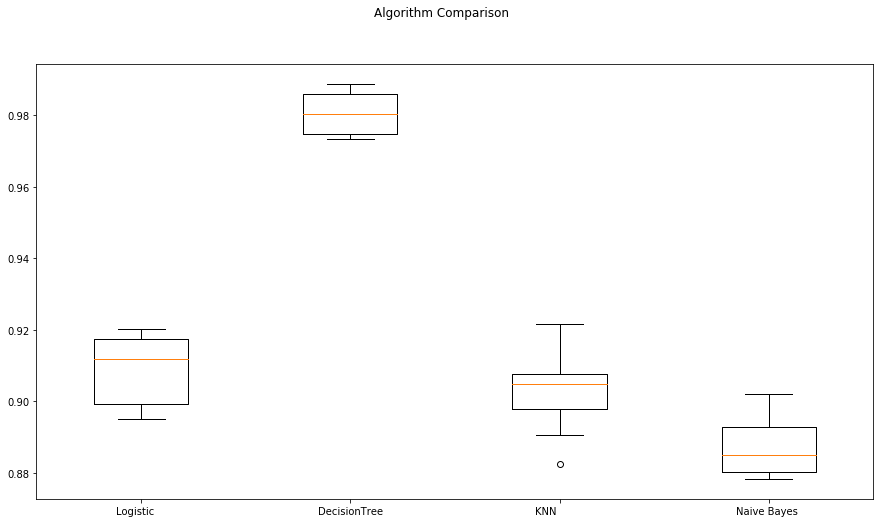

In [52]:
from sklearn import model_selection

models=[]

models.append(('Logistic    ',lr_model))
models.append(('DecisionTree',dt_model))
models.append(('KNN         ',kn_model))
models.append(('Naive Bayes ',nb_model))

results=[]
names=[]

scoring='accuracy'

for name,model in models:
    kfold=model_selection.KFold(n_splits=7,random_state=2)
    cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig=plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### After crossvalidation DecisionTree is giving out the highest accuracy with less variance.

## Using ensemble methods

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

### Bagging

In [54]:
bg_model = BaggingClassifier(oob_score=True)

In [55]:
bg_model.fit(x_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=True, random_state=None,
         verbose=0, warm_start=False)

In [56]:
bg_model.predict(x_val)

array([0, 1, 1, ..., 0, 1, 1])

In [57]:
bg_model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
print(bg_model.score(x_val,y_val))
print(bg_model.score(x_test,y_test))

0.9826224328593997
0.9852507374631269


In [59]:
bg_model.oob_score_

0.9742605554301197

### AdaBoosting

In [60]:
ad_model = AdaBoostClassifier()

In [61]:
ad_model.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [62]:
ad_model.predict(x_val)

array([0, 1, 1, ..., 0, 1, 1])

In [63]:
ad_model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
ad_model.score(x_val,y_val)

0.9726171669299631

In [65]:
ad_model.score(x_test,y_test)

0.9705014749262537

### Gradient Boosting

In [66]:
gb_model = GradientBoostingClassifier()

In [67]:
gb_model.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [68]:
gb_model.predict(x_val)

array([0, 1, 1, ..., 0, 1, 1])

In [69]:
gb_model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
print(gb_model.score(x_val,y_val))
print(gb_model.score(x_test,y_test))

0.9878883622959452
0.987094395280236


### RandomForest

In [71]:
rf_model = RandomForestClassifier(oob_score=True)

In [72]:
rf_model.fit(x_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [73]:
rf_model.predict(x_val)

array([0, 1, 1, ..., 0, 1, 1])

In [74]:
rf_model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
rf_model.score(x_test,y_test)

0.9856194690265486

In [76]:
rf_model.oob_score_

0.9749379092345902

Logistic    : 0.907400 (0.007592)
DecisionTree: 0.978800 (0.011391)
KNN         : 0.900000 (0.015388)
Naive Bayes : 0.887000 (0.010440)
Bagging     : 0.985200 (0.003124)
AdaBoost    : 0.984000 (0.007537)
Gradient    : 0.983800 (0.009315)
RandomForest: 0.984800 (0.004118)


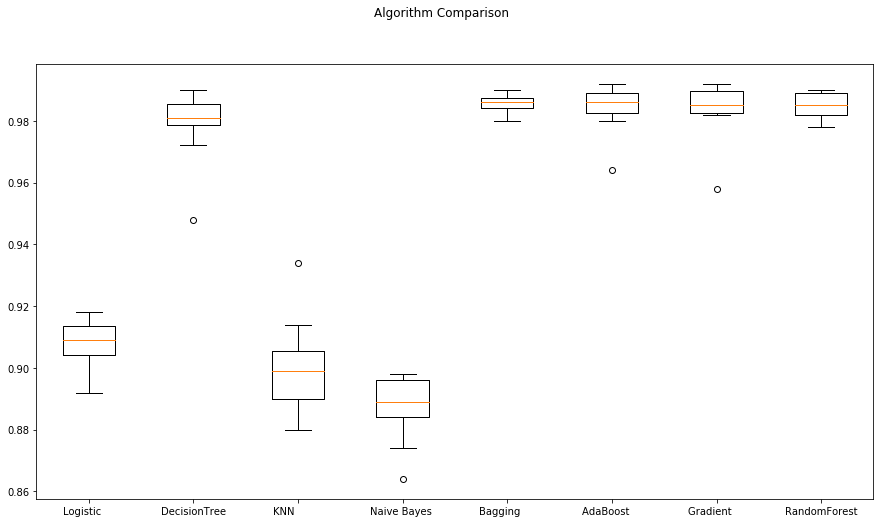

In [78]:
from sklearn import model_selection

models=[]

models.append(('Logistic    ',lr_model))
models.append(('DecisionTree',dt_model))
models.append(('KNN         ',kn_model))
models.append(('Naive Bayes ',nb_model))
models.append(('Bagging     ',bg_model))
models.append(('AdaBoost    ',bg_model))
models.append(('Gradient    ',gb_model))
models.append(('RandomForest',rf_model))

results=[]
names=[]

scoring='accuracy'

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=2)
    cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig=plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### After ensemble techniques implemented. Bagging is giving out the highest accuracy with less variance. 
### Bootstrap sampling is taking so much time to process.